# Лабораторная работа 2. Сэмплинг

## Импорт библиотек

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

sns.set_style("whitegrid")

## Загрузка данных

In [5]:
dataset_path = "../datasets/gtzan/features_30_sec.csv"
data = pd.read_csv(dataset_path)

print(f"Размер датасета: {data.shape[0]} строк, {data.shape[1]} столбцов")
data.head()

Размер датасета: 1000 строк, 60 столбцов


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


## Описательная статистика

In [6]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


## Анализ баланса классов

Датасет GTZAN содержит 10 жанров по 100 записей каждый — идеально сбалансированный набор. Для демонстрации методов сэмплинга создадим задачу бинарной классификации: выделим жанр **jazz** как положительный класс, а все остальные жанры объединим в отрицательный класс. Это создаст дисбаланс примерно **1:9** (100 vs 900).

C:\Users\ichap\AppData\Local\Temp\ipykernel_46704\2739187220.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis", ax=axes[0])


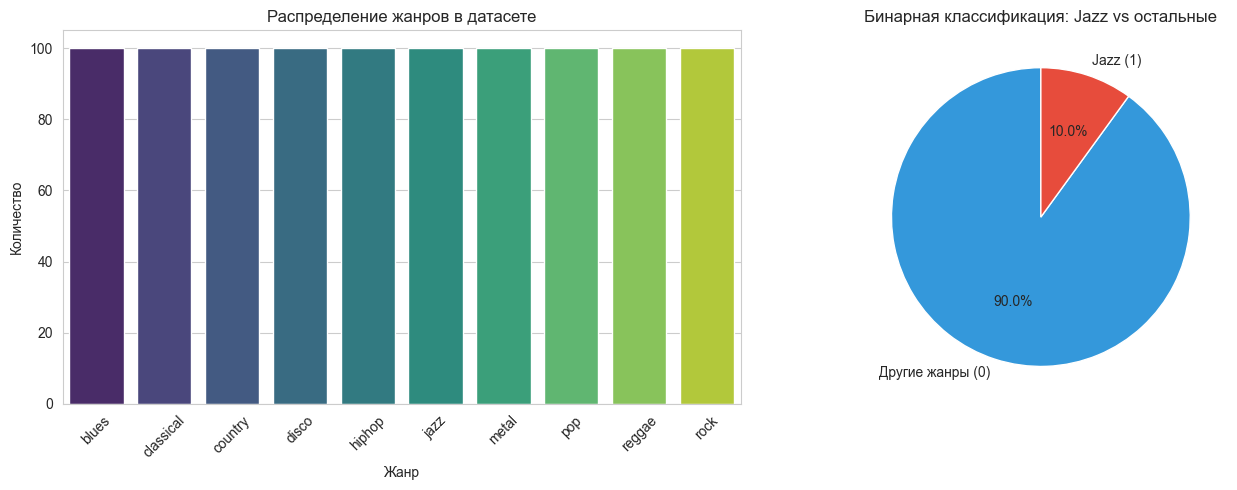

Класс 0 (не jazz): 900 (90.0%)
Класс 1 (jazz):    100 (10.0%)
Соотношение: 9.0 : 1


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# распределение по жанрам
genre_counts = data["label"].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title("Распределение жанров в датасете")
axes[0].set_xlabel("Жанр")
axes[0].set_ylabel("Количество")
axes[0].tick_params(axis="x", rotation=45)

# создаём бинарную целевую переменную
data["is_jazz"] = (data["label"] == "jazz").astype(int)

# pie-chart бинарного класса
jazz_counts = data["is_jazz"].value_counts()
colors = ["#3498db", "#e74c3c"]
axes[1].pie(
    jazz_counts.values,
    labels=["Другие жанры (0)", "Jazz (1)"],
    autopct="%.1f%%",
    colors=colors,
    startangle=90,
)
axes[1].set_title("Бинарная классификация: Jazz vs остальные")

plt.tight_layout()
plt.show()

print(f"Класс 0 (не jazz): {jazz_counts[0]} ({jazz_counts[0]/len(data)*100:.1f}%)")
print(f"Класс 1 (jazz):    {jazz_counts[1]} ({jazz_counts[1]/len(data)*100:.1f}%)")
print(f"Соотношение: {jazz_counts[0]/jazz_counts[1]:.1f} : 1")

## Правило NEPV (Number of Events Per Variable)

Правило NEPV определяет минимальный размер выборки для надёжного обучения модели. Рекомендуемое значение: **NEPV >= 10**, то есть на каждую независимую переменную должно приходиться не менее 10 наблюдений миноритарного класса.

Для нашей задачи:
- Количество признаков: 58
- Миноритарный класс (jazz): 100
- **NEPV = 100 / 58 ≈ 1.75**

NEPV < 10, что указывает на недостаточный объём выборки для надёжной модели с использованием всех признаков. Это мотивирует применение методов оверсэмплинга для увеличения количества наблюдений миноритарного класса.

## Подготовка признаков

In [8]:
feature_cols = data.columns.drop(["filename", "label", "is_jazz"])
X = data[feature_cols]
y = data["is_jazz"]

print(f"Признаки: {X.shape[1]} столбцов")
print(f"Выборка: {X.shape[0]} строк")

Признаки: 58 столбцов
Выборка: 1000 строк


## Простой случайный сэмплинг

In [9]:
sample = data.sample(n=100, random_state=42)

print(f"Размер выборки: {len(sample)}")
print(f"\nРаспределение жанров в случайной выборке:")
print(sample["label"].value_counts())
print(f"\nДоля jazz в выборке: {(sample['is_jazz'] == 1).sum()} из {len(sample)}")

Размер выборки: 100

Распределение жанров в случайной выборке:
label
jazz         13
metal        13
blues        13
country      13
disco        10
reggae        9
rock          9
pop           8
hiphop        6
classical     6
Name: count, dtype: int64

Доля jazz в выборке: 13 из 100


## Стратифицированное разбиение на обучающую и тестовую выборки

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print(f"Обучающая выборка: {X_train.shape[0]} строк")
print(f"Тестовая выборка:  {X_test.shape[0]} строк")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts())
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())
print(f"\nДоля jazz в train: {y_train.mean():.2%}")
print(f"Доля jazz в test:  {y_test.mean():.2%}")

Обучающая выборка: 750 строк
Тестовая выборка:  250 строк

Распределение классов в обучающей выборке:
is_jazz
0    675
1     75
Name: count, dtype: int64

Распределение классов в тестовой выборке:
is_jazz
0    225
1     25
Name: count, dtype: int64

Доля jazz в train: 10.00%
Доля jazz в test:  10.00%


## Методы ресэмплинга

Далее применим методы балансировки классов к **обучающей выборке** (ресэмплинг применяется только к train, не к test):

1. **RandomUnderSampler** — случайный андерсэмплинг
2. **RandomOverSampler** — случайный оверсэмплинг
3. **SMOTE** — синтетический оверсэмплинг
4. **Tomek Links** — андерсэмплинг на основе удаления пограничных пар

### 1. Случайный андерсэмплинг (RandomUnderSampler)

In [11]:
rus = RandomUnderSampler(sampling_strategy="not minority", random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

print(f"До андерсэмплинга:    {len(y_train)} строк")
print(f"После андерсэмплинга: {len(y_under)} строк")
print(f"Удалено строк: {len(y_train) - len(y_under)}")
print(f"\nРаспределение классов:")
print(y_under.value_counts())

До андерсэмплинга:    750 строк
После андерсэмплинга: 150 строк
Удалено строк: 600

Распределение классов:
is_jazz
0    75
1    75
Name: count, dtype: int64


### 2. Случайный оверсэмплинг (RandomOverSampler)

In [12]:
ros = RandomOverSampler(sampling_strategy="not majority", random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

print(f"До оверсэмплинга:    {len(y_train)} строк")
print(f"После оверсэмплинга: {len(y_over)} строк")
print(f"Добавлено строк: {len(y_over) - len(y_train)}")
print(f"\nРаспределение классов:")
print(y_over.value_counts())

До оверсэмплинга:    750 строк
После оверсэмплинга: 1350 строк
Добавлено строк: 600

Распределение классов:
is_jazz
0    675
1    675
Name: count, dtype: int64


### 3. SMOTE (Synthetic Minority Over-sampling Technique)

In [13]:
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print(f"До SMOTE:    {len(y_train)} строк")
print(f"После SMOTE: {len(y_smote)} строк")
print(f"Синтезировано строк: {len(y_smote) - len(y_train)}")
print(f"\nРаспределение классов:")
print(y_smote.value_counts())

До SMOTE:    750 строк
После SMOTE: 1350 строк
Синтезировано строк: 600

Распределение классов:
is_jazz
0    675
1    675
Name: count, dtype: int64


### 4. Tomek Links

In [14]:
tl = TomekLinks(sampling_strategy="majority")
X_tomek, y_tomek = tl.fit_resample(X_train, y_train)

print(f"До Tomek Links:    {len(y_train)} строк")
print(f"После Tomek Links: {len(y_tomek)} строк")
print(f"Удалено строк: {len(y_train) - len(y_tomek)}")
print(f"\nРаспределение классов:")
print(y_tomek.value_counts())

До Tomek Links:    750 строк
После Tomek Links: 716 строк
Удалено строк: 34

Распределение классов:
is_jazz
0    641
1     75
Name: count, dtype: int64


## Сравнение результатов

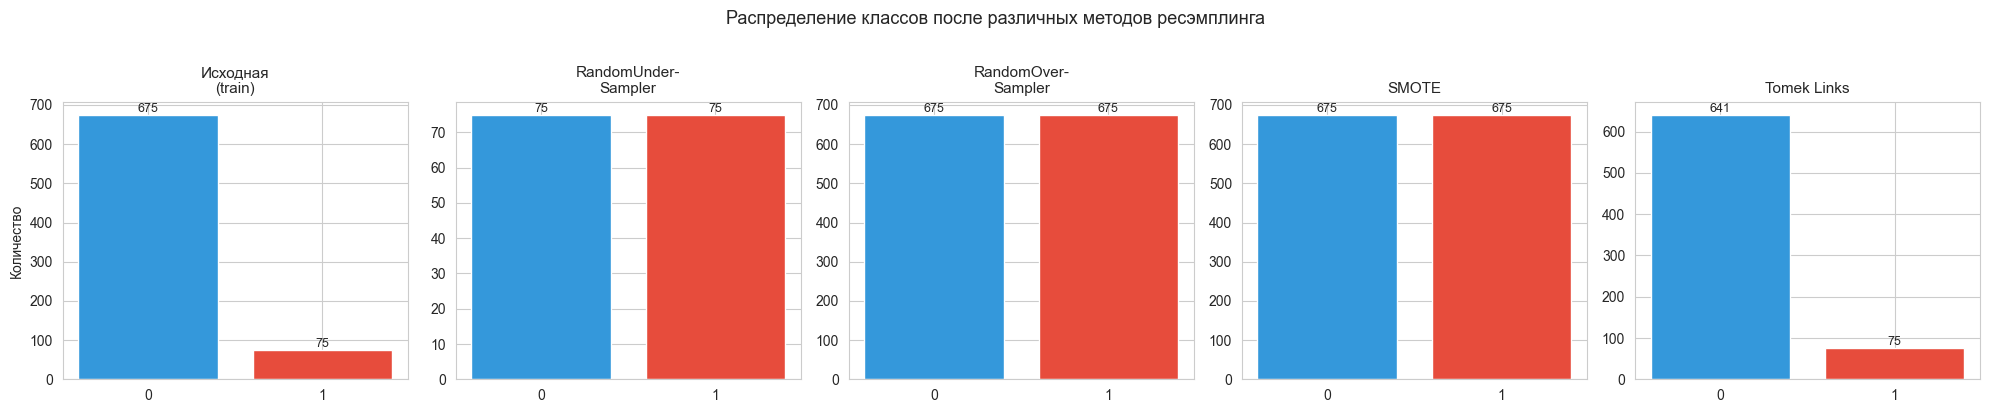

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

datasets = [
    ("Исходная\n(train)", y_train),
    ("RandomUnder-\nSampler", y_under),
    ("RandomOver-\nSampler", y_over),
    ("SMOTE", y_smote),
    ("Tomek Links", y_tomek),
]

palette = {0: "#3498db", 1: "#e74c3c"}

for ax, (title, target) in zip(axes, datasets):
    counts = pd.Series(target).value_counts().sort_index()
    bars = ax.bar(counts.index, counts.values, color=[palette[i] for i in counts.index])
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Количество" if ax == axes[0] else "")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["0", "1"])
    for bar in bars:
        ax.annotate(
            f"{int(bar.get_height())}",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha="center", va="bottom", fontsize=9,
        )

plt.suptitle("Распределение классов после различных методов ресэмплинга", fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

In [17]:
results = pd.DataFrame({
    "Метод": ["Исходная (train)", "RandomUnderSampler", "RandomOverSampler", "SMOTE", "Tomek Links"],
    "Всего строк": [len(y_train), len(y_under), len(y_over), len(y_smote), len(y_tomek)],
    "Класс 0": [
        (y_train == 0).sum(), (y_under == 0).sum(), (y_over == 0).sum(),
        (y_smote == 0).sum(), (y_tomek == 0).sum()
    ],
    "Класс 1": [
        (y_train == 1).sum(), (y_under == 1).sum(), (y_over == 1).sum(),
        (y_smote == 1).sum(), (y_tomek == 1).sum()
    ],
})
results["Доля класса 1"] = (results["Класс 1"] / results["Всего строк"] * 100).round(1).astype(str) + "%"
results["Соотношение 0:1"] = (results["Класс 0"] / results["Класс 1"]).round(2).astype(str) + " : 1"

results

,Метод,Всего строк,Класс 0,Класс 1,Доля класса 1,Соотношение 0:1
0,Исходная (train),750,675,75,10.0%,9.0 : 1
1,RandomUnderSampler,150,75,75,50.0%,1.0 : 1
2,RandomOverSampler,1350,675,675,50.0%,1.0 : 1
3,SMOTE,1350,675,675,50.0%,1.0 : 1
4,Tomek Links,716,641,75,10.5%,8.55 : 1


## Анализ распределения признаков после SMOTE

C:\Users\ichap\AppData\Local\Temp\ipykernel_46704\2507366561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x="source", y="value", palette=["#e74c3c", "#f39c12"], ax=ax)
C:\Users\ichap\AppData\Local\Temp\ipykernel_46704\2507366561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x="source", y="value", palette=["#e74c3c", "#f39c12"], ax=ax)
C:\Users\ichap\AppData\Local\Temp\ipykernel_46704\2507366561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x="source", y="value", palette

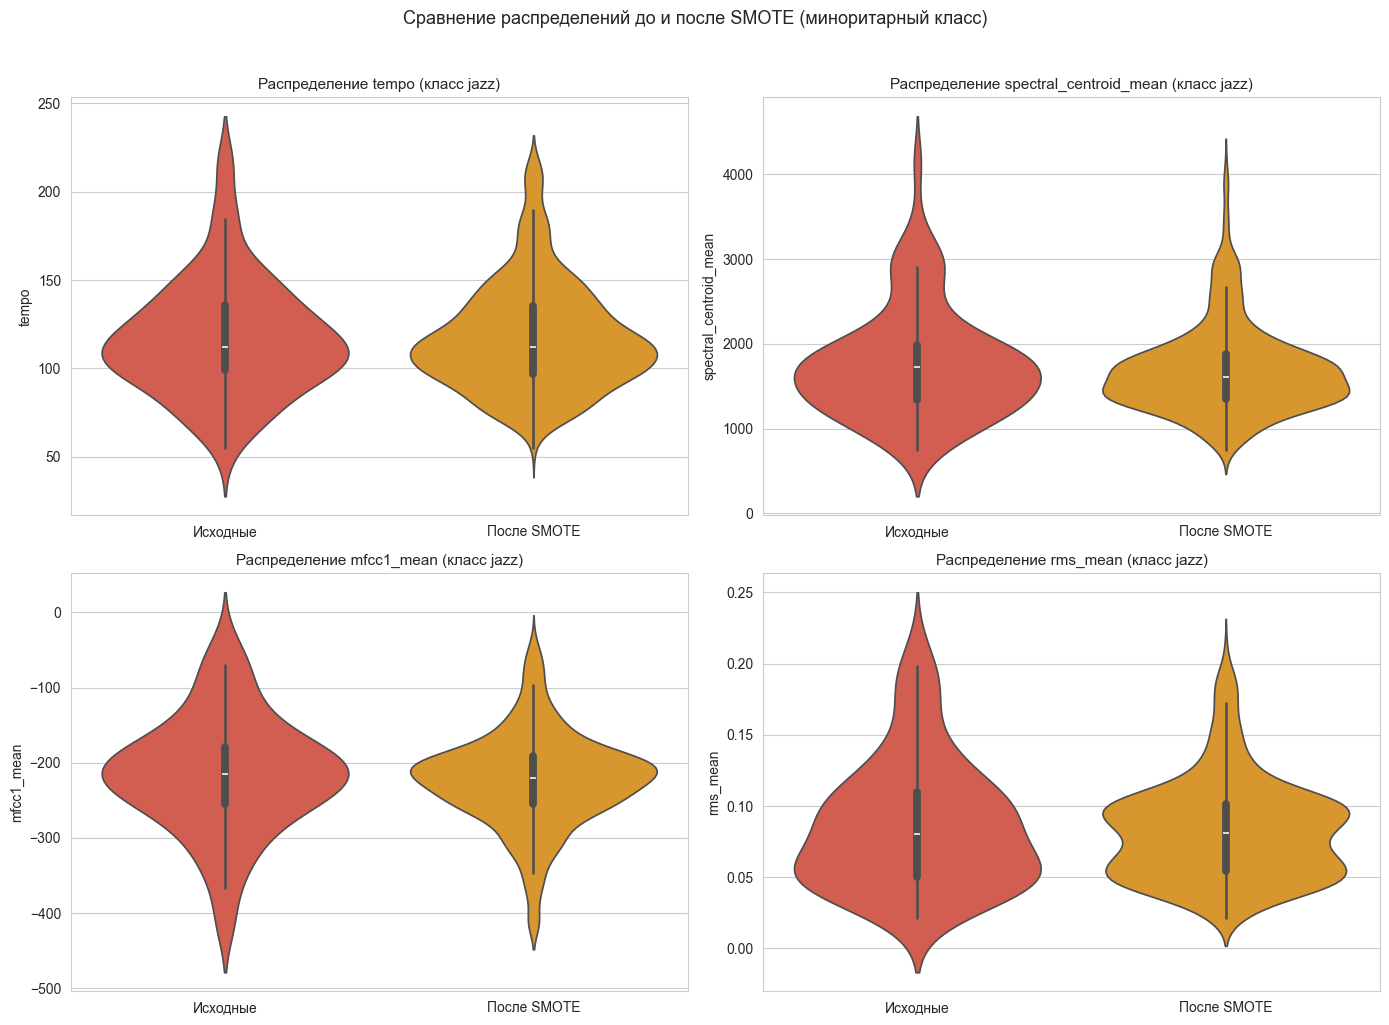

In [18]:
compare_features = ["tempo", "spectral_centroid_mean", "mfcc1_mean", "rms_mean"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, feat in zip(axes.ravel(), compare_features):
    df_orig = pd.DataFrame({"value": X_train[feat].values[y_train.values == 1], "source": "Исходные"})
    df_sm = pd.DataFrame({"value": X_smote[feat].values[y_smote.values == 1], "source": "После SMOTE"})
    df_plot = pd.concat([df_orig, df_sm])

    sns.violinplot(data=df_plot, x="source", y="value", palette=["#e74c3c", "#f39c12"], ax=ax)
    ax.set_title(f"Распределение {feat} (класс jazz)", fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel(feat)

plt.suptitle("Сравнение распределений до и после SMOTE (миноритарный класс)", fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

## Проверка SMOTE на дубликаты

In [19]:
smote_jazz = pd.DataFrame(X_smote[y_smote == 1])
over_jazz = pd.DataFrame(X_over[y_over == 1])

smote_dups = smote_jazz.duplicated().sum()
over_dups = over_jazz.duplicated().sum()

print(f"SMOTE — дубликаты в классе jazz: {smote_dups} из {len(smote_jazz)}")
print(f"RandomOverSampler — дубликаты в классе jazz: {over_dups} из {len(over_jazz)}")
print(f"\nSMOTE создаёт синтетические (интерполированные) точки,")
print(f"а RandomOverSampler копирует существующие наблюдения.")

SMOTE — дубликаты в классе jazz: 0 из 675
RandomOverSampler — дубликаты в классе jazz: 600 из 675

SMOTE создаёт синтетические (интерполированные) точки,
а RandomOverSampler копирует существующие наблюдения.


## Сравнение средних значений признаков

In [20]:
compare_cols = ["tempo", "spectral_centroid_mean", "rms_mean", "mfcc1_mean", "mfcc2_mean"]

means = pd.DataFrame({
    "Исходные (train)": X_train[y_train == 1][compare_cols].mean(),
    "UnderSampler": X_under[y_under == 1][compare_cols].mean(),
    "OverSampler": X_over[y_over == 1][compare_cols].mean(),
    "SMOTE": X_smote[y_smote == 1][compare_cols].mean(),
    "Tomek Links": X_tomek[y_tomek == 1][compare_cols].mean(),
})

means.round(3)

,Исходные (train),UnderSampler,OverSampler,SMOTE,Tomek Links
tempo,117.069,117.069,116.138,117.724,117.069
spectral_centroid_mean,1765.180,1765.180,1807.356,1694.100,1765.180
rms_mean,0.086,0.086,0.088,0.083,0.086
mfcc1_mean,-215.414,-215.414,-211.399,-222.792,-215.414
mfcc2_mean,115.585,115.585,113.369,118.356,115.585


## Выводы

1. Датасет GTZAN изначально сбалансирован (10 жанров по 100 записей). Для демонстрации методов сэмплинга была создана бинарная задача «jazz vs остальные» с дисбалансом 9:1.

2. Правило **NEPV** показало, что при 57 признаках и 100 наблюдениях миноритарного класса объём выборки недостаточен (NEPV ≈ 1.75 < 10).

3. **Стратифицированное разбиение** сохранило пропорции классов в обучающей и тестовой выборках.

4. Результаты ресэмплинга:
   - **RandomUnderSampler**: полная балансировка за счёт значительной потери данных (удалено ~600 строк)
   - **RandomOverSampler**: полная балансировка за счёт дублирования наблюдений миноритарного класса
   - **SMOTE**: полная балансировка за счёт синтетических (интерполированных) наблюдений — более предпочтительный метод, так как не создаёт точных дубликатов
   - **Tomek Links**: мягкая очистка границ классов, удаляет небольшое количество пограничных наблюдений — не приводит к полной балансировке, но улучшает разделимость классов